### Essential Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df[df == '?'] = np.nan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
for col in ['workclass','occupation','native.country']:
    df[col].fillna(df[col].mode()[0],inplace=True)
    

In [8]:
df['workclass'] = df['workclass'].str.replace('-',' ')

In [9]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [10]:
education_mapping = {
    'Preschool': 'Primary Education', '1st-4th': 'Primary Education', '5th-6th': 'Primary Education', '7th-8th': 'Primary Education',
    '9th': 'Secondary Education', '10th': 'Secondary Education', '11th': 'Secondary Education', '12th': 'Secondary Education',
    'Assoc-voc': 'Associate', 'Assoc-acdm': 'Associate',
    'HS-grad': 'Undergraduate', 'Some-college': 'Undergraduate', 'Bachelors': 'Undergraduate',
    'Masters': 'Postgraduate', 'Doctorate': 'Postgraduate', 'Prof-school': 'Postgraduate'
}
df['new_education']= df['education'].replace(education_mapping)

In [11]:
df = df.drop('education',axis=1)

In [12]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [13]:
df['marital.status'] = df['marital.status'].apply(lambda x :'Other' if x in ['Married-spouse-absent','Married-AF-spouse'] else x )

In [14]:
df['marital.status'] = df['marital.status'].str.replace('-','')

In [15]:
df['marital.status'].value_counts()

marital.status
Marriedcivspouse    14976
Nevermarried        10683
Divorced             4443
Separated            1025
Widowed               993
Other                 441
Name: count, dtype: int64

In [16]:
df['occupation'].value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [17]:
df['occupation'] = df['occupation'].str.replace('-','')

In [18]:
df['relationship'] = df['relationship'].str.replace('-','')

In [19]:
df.rename(columns=(lambda x : x.replace('.','_')),inplace=True)

In [20]:
df.replace({'income': {'<=50K':0}},inplace=True)
df.replace({'income': {'>50K':1}},inplace=True)

In [21]:
df['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [22]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,new_education
0,90,Private,77053,9,Widowed,Profspecialty,Notinfamily,White,Female,0,4356,40,United-States,0,Undergraduate
1,82,Private,132870,9,Widowed,Execmanagerial,Notinfamily,White,Female,0,4356,18,United-States,0,Undergraduate
2,66,Private,186061,10,Widowed,Profspecialty,Unmarried,Black,Female,0,4356,40,United-States,0,Undergraduate
3,54,Private,140359,4,Divorced,Machineopinspct,Unmarried,White,Female,0,3900,40,United-States,0,Primary Education
4,41,Private,264663,10,Separated,Profspecialty,Ownchild,White,Female,0,3900,40,United-States,0,Undergraduate


In [23]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


<Axes: xlabel='capital_loss', ylabel='Count'>

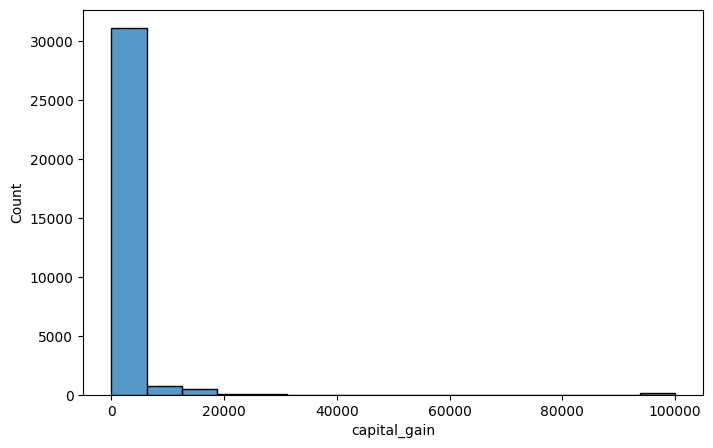

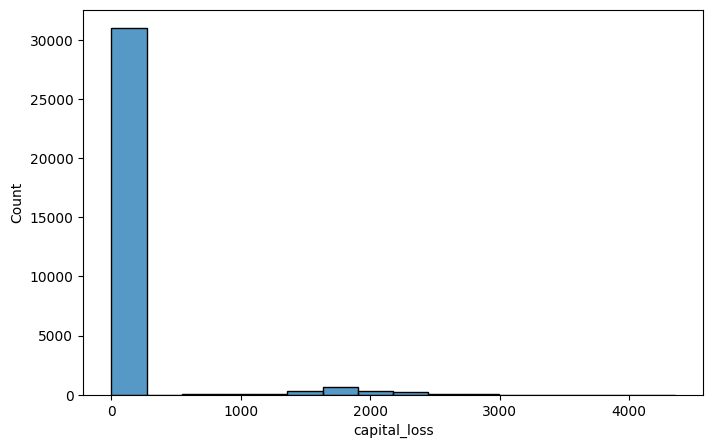

In [24]:
fig, ax = plt.subplots(figsize= (8,5))
sns.histplot(df.capital_gain)
fig, ax = plt.subplots(figsize= (8,5))
sns.histplot(df.capital_loss)

In [25]:
df = df[df['capital_gain'] < 80000 ].reset_index(drop = True)

In [26]:
df.shape

(32402, 15)

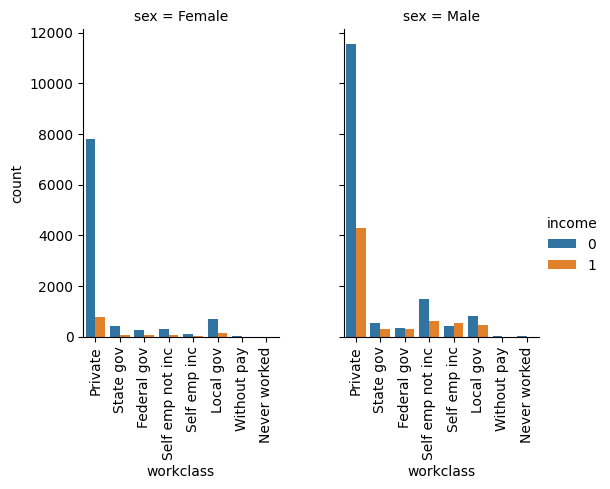

In [27]:
a = sns.catplot(data= df,x = 'workclass',col= 'sex', hue='income', height=4, kind='count',aspect=.7)
a.set_xticklabels(rotation = 90)
plt.show()

<Axes: xlabel='age', ylabel='sex'>

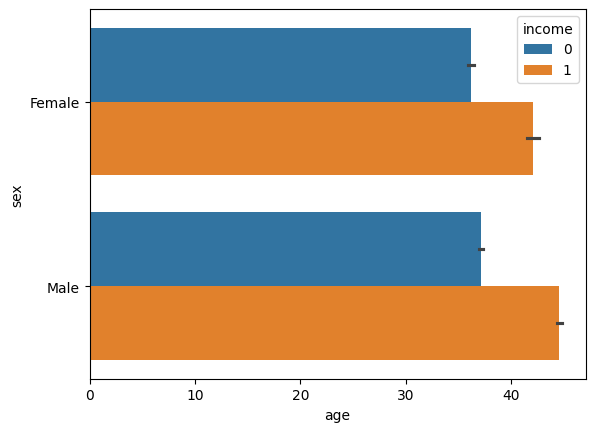

In [28]:
sns.barplot(data=df, x ='age', y='sex',hue= 'income')

In [29]:
X = df.drop(['income','native_country','marital_status','relationship','hours_per_week'], axis= 1) 
Y = df['income']

In [30]:
df['income'].value_counts()

income
0    24720
1     7682
Name: count, dtype: int64

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
def testing_the_models(X_train,X_test,Y_train,Y_test,model):
    ohe = OneHotEncoder()
    ohe.fit(X[['workclass','occupation','race','sex','new_education']])

    columstrans = make_column_transformer(
        (OneHotEncoder(categories=ohe.categories_),['workclass','occupation','race','sex','new_education']),
        (StandardScaler(),['age','fnlwgt','education_num','capital_gain','capital_loss']),
        remainder='passthrough'
    )

    pipe = make_pipeline(columstrans,model)
    pipe.fit(X_train,Y_train)
    ypred = pipe.predict(X_test)

    print(f'The R2 score for {model.__class__.__name__} is ',r2_score(Y_test,ypred))
    print(f'The MAE for {model.__class__.__name__} is ',mean_absolute_error(Y_test,ypred))

models = [
    LogisticRegression(solver='lbfgs',max_iter=1000),
    KNeighborsClassifier(n_neighbors=5),
    XGBClassifier(n_estimators =100, learning_rate=1),
    SVC(kernel='rbf', gamma='auto'),
    RandomForestClassifier(n_estimators=200, max_depth=10),
    AdaBoostClassifier(n_estimators=100,learning_rate=.5),
    GradientBoostingClassifier(n_estimators=100,learning_rate=.1),
    ]

for model in models:
    testing_the_models(X_train,X_test,Y_train,Y_test,model)
    print('-'* 50)

The R2 score for LogisticRegression is  0.05414079926016835
The MAE for LogisticRegression is  0.17142416293781823
--------------------------------------------------
The R2 score for KNeighborsClassifier is  -0.04035998497216409
The MAE for KNeighborsClassifier is  0.1885511495139639
--------------------------------------------------
The R2 score for XGBClassifier is  0.048181290344615935
The MAE for XGBClassifier is  0.17250424317234994
--------------------------------------------------
The R2 score for SVC is  0.05584351609318339
The MAE for SVC is  0.17111556858509488
--------------------------------------------------
The R2 score for RandomForestClassifier is  0.1052223042506184
The MAE for RandomForestClassifier is  0.16216633235611788
--------------------------------------------------
The R2 score for AdaBoostClassifier is  0.13076305674584332
The MAE for AdaBoostClassifier is  0.1575374170652677
--------------------------------------------------
The R2 score for GradientBoosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

def testing_the_models(X_train,X_test,Y_train,Y_test,model):
    # Define categorical and numeric columns
    categorical = ['workclass', 'new_education', 'occupation', 'race', 'sex']
    numeric = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss']
    
    # Define the column transformer that applies OneHotEncoder to categorical and StandardScaler to numeric
    col_transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
            ('num', StandardScaler(), numeric)
        ],
        remainder='passthrough'  # Keep any other columns unchanged
    )
    
    # Define the pipeline with the column transformer and the LogisticRegression model
    pipe = Pipeline(steps=[
        ('preprocessor', col_transformer),
        ('classifier', model)
    ])
    
    # Train the pipeline
    pipe.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = pipe.predict(X_test)
    print(f'the r2 score with pipeline: {r2_score(Y_test, y_pred)}')
    print(f'the mae score with pipeline: {mean_absolute_error(Y_test, y_pred)}')
    print(f'the mae score with pipeline: {accuracy_score(Y_test, y_pred)}')
    
models = [
    LogisticRegression(solver='lbfgs',max_iter=1000),
    KNeighborsClassifier(n_neighbors=5),
    XGBClassifier(n_estimators =100, learning_rate=1),
    SVC(kernel='rbf', gamma='auto'),
    RandomForestClassifier(n_estimators=200, max_depth=10),
    AdaBoostClassifier(n_estimators=100,learning_rate=.5),
    GradientBoostingClassifier(n_estimators=100,learning_rate=.1),
    ]
# Evaluate the model
for model in models:
    testing_the_models(X_train,X_test,Y_train,Y_test,model)
    print('-'* 50)



the r2 score with pipeline: 0.027444281804524295
the mae score with pipeline: 0.17940541096595
the mae score with pipeline: 0.82059458903405
--------------------------------------------------
the r2 score with pipeline: -0.012149442961461254
the mae score with pipeline: 0.186709186297706
the mae score with pipeline: 0.8132908137022941
--------------------------------------------------
the r2 score with pipeline: 0.07149927133287437
the mae score with pipeline: 0.17127867503343278
the mae score with pipeline: 0.8287213249665673
--------------------------------------------------
the r2 score with pipeline: 0.03692446942454897
the mae score with pipeline: 0.17765661968933238
the mae score with pipeline: 0.8223433803106677
--------------------------------------------------
the r2 score with pipeline: 0.10551641514590415
the mae score with pipeline: 0.16500360045262832
the mae score with pipeline: 0.8349963995473717
--------------------------------------------------
